The intention of this notebook is to follow a tutorial to reach maximum score with the Titanic Kaggle competition.

The tutorial is in https://medium.datadriveninvestor.com/start-with-kaggle-a-comprehensive-guide-to-solve-the-titanic-challenge-8ac5815b0473

I just copy the titles and program. All comments are in the tutorial

# 0 - Environment setup

Throughout this jupyter notebook, I will be using Python at each level of the pipeline. The main libraries involved in this tutorial are:
- Pandas for data manipulation and ingestion
- Matplotlib and seaborn for data visualization
- Numpy for multidimensional array computing
- sklearn for machine learning and predictive modeling

A very easy way to install these packages is to download and install the Conda distribution that encapsulates them all. This distribution is available on all platforms (Windows, Linux, and Mac OSX).
If you have a question about the code or the hypotheses I made, do not hesitate to post a comment in the comment section below. If you also have a suggestion on how this notebook could be improved, please reach out to me. This tutorial is available on my Github account.
I hope you’ve got everything set on your computer. Let’s get started.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as plot
import seaborn as sns
import sklearn as sk
import warnings

In [2]:
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [3]:
pd.options.display.max_columns=100

In [4]:
params = {
    'axes.labelsize' : 'large',
    'xtick.labelsize' : 'x-large',
    'legend.fontsize' : 20,
    'figure.dpi' : 150,
    'figure.figsize': [25, 7]
}
plot.rcParams.update(params)

# 1 - Exploratory data analysis

As in different data projects, we’ll first start diving into the data and build up our first intuitions.
In this section, we’ll be doing four things.
- Data extraction: we’ll load the dataset and have a first look at it.
- Cleaning: we’ll fill in missing values.
- Plotting: we’ll create some interesting charts that’ll (hopefully) spot correlations and hidden insights out of the data.
- Assumptions: we’ll formulate hypotheses from the charts.

We tweak the style of this notebook a little bit to have centered plots.

Two datasets are available: a training set and a test set. We’ll be using the training set to build our predictive model and the testing set to score it and generate an output file to submit on the Kaggle evaluation system.

We’ll see how this procedure is done at the end of this post.

Now let’s start by loading the training set.

In [5]:
data = pd.read_csv('./data/train.csv')
data.shape

(891, 12)

We have:
- 891 rows
- 12 columns

Pandas allow you to have a sneak peek at your data.

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The Survived column is the _target variable_. If Survival = 1 the passenger survived, otherwise he’s dead. This is the variable we’re going to predict.
The other variables describe the passengers. They are the features.
- PassengerId: and id that is given to each traveler on the boat
- Pclass: the passenger class. It has three possible values: 1,2,3 (first, second and third class)
- The Name of the passenger
- The Sex
- The Age
- SibSp: number of siblings and spouses traveling with the passenger
- Parch: number of parents and children traveling with the passenger
- The ticket number
- The ticket fare
- The cabin number
- The embarkation. This describes three possible areas of the Titanic from which the people embark. Three possible values S, C, Q

Pandas allow you to have a high-level simple statistical description of the numerical features. This can be done using the describe method.

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The count variable shows that 177 values are missing in the Age column.

One solution is to fill in the null values with the median age. We could also impute with the mean age but the median is more robust to outliers.

In [8]:
print(data.Age.median())
data.Age = data.Age.fillna(data.Age.median())
data.describe()

28.0


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let’s now make some charts.

Let’s visualize survival based on gender.

<AxesSubplot:xlabel='Sex'>

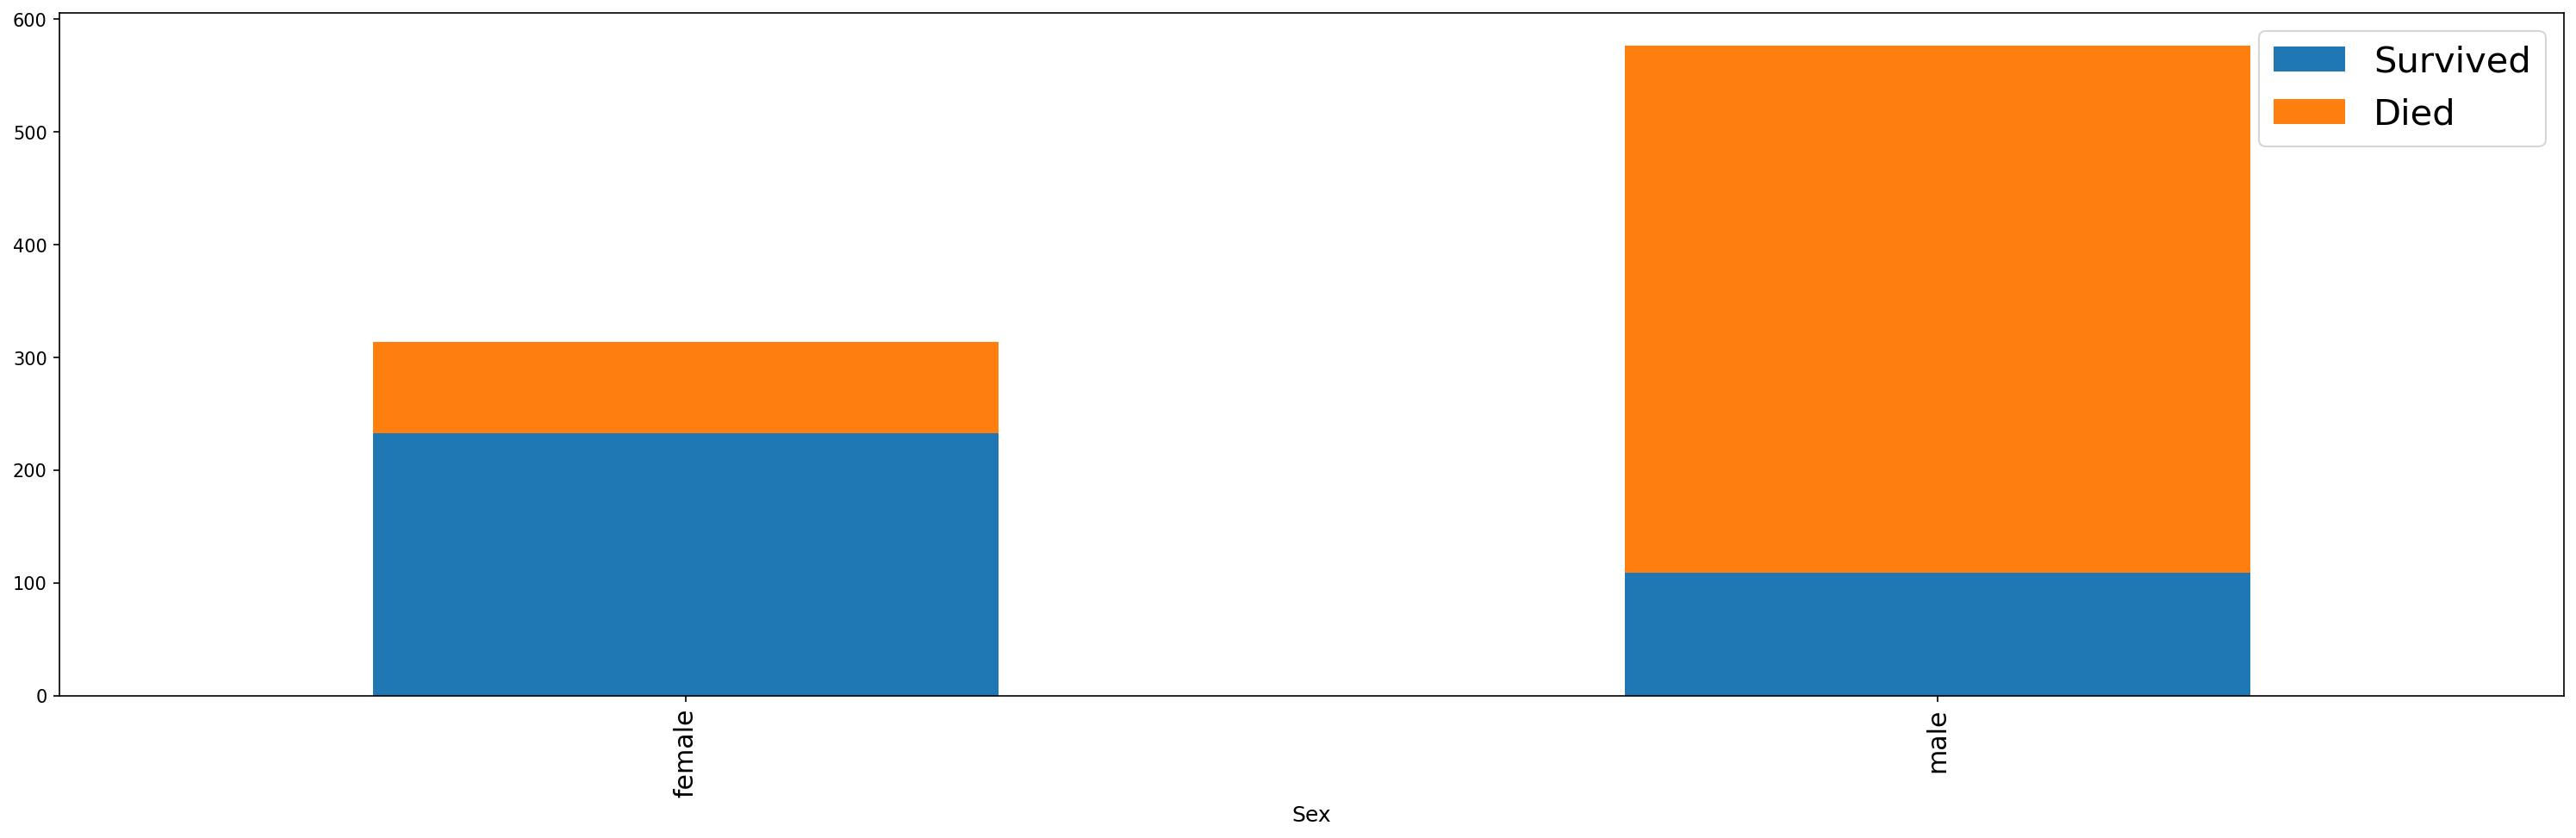

In [9]:
data['Died'] = 1 - data['Survived']
data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar', 
                                                          figsize=(25,7), stacked=True)

It looks like male passengers are more likely to succumb.

Let’s plot the same graph but with ratio instead.

<AxesSubplot:xlabel='Sex'>

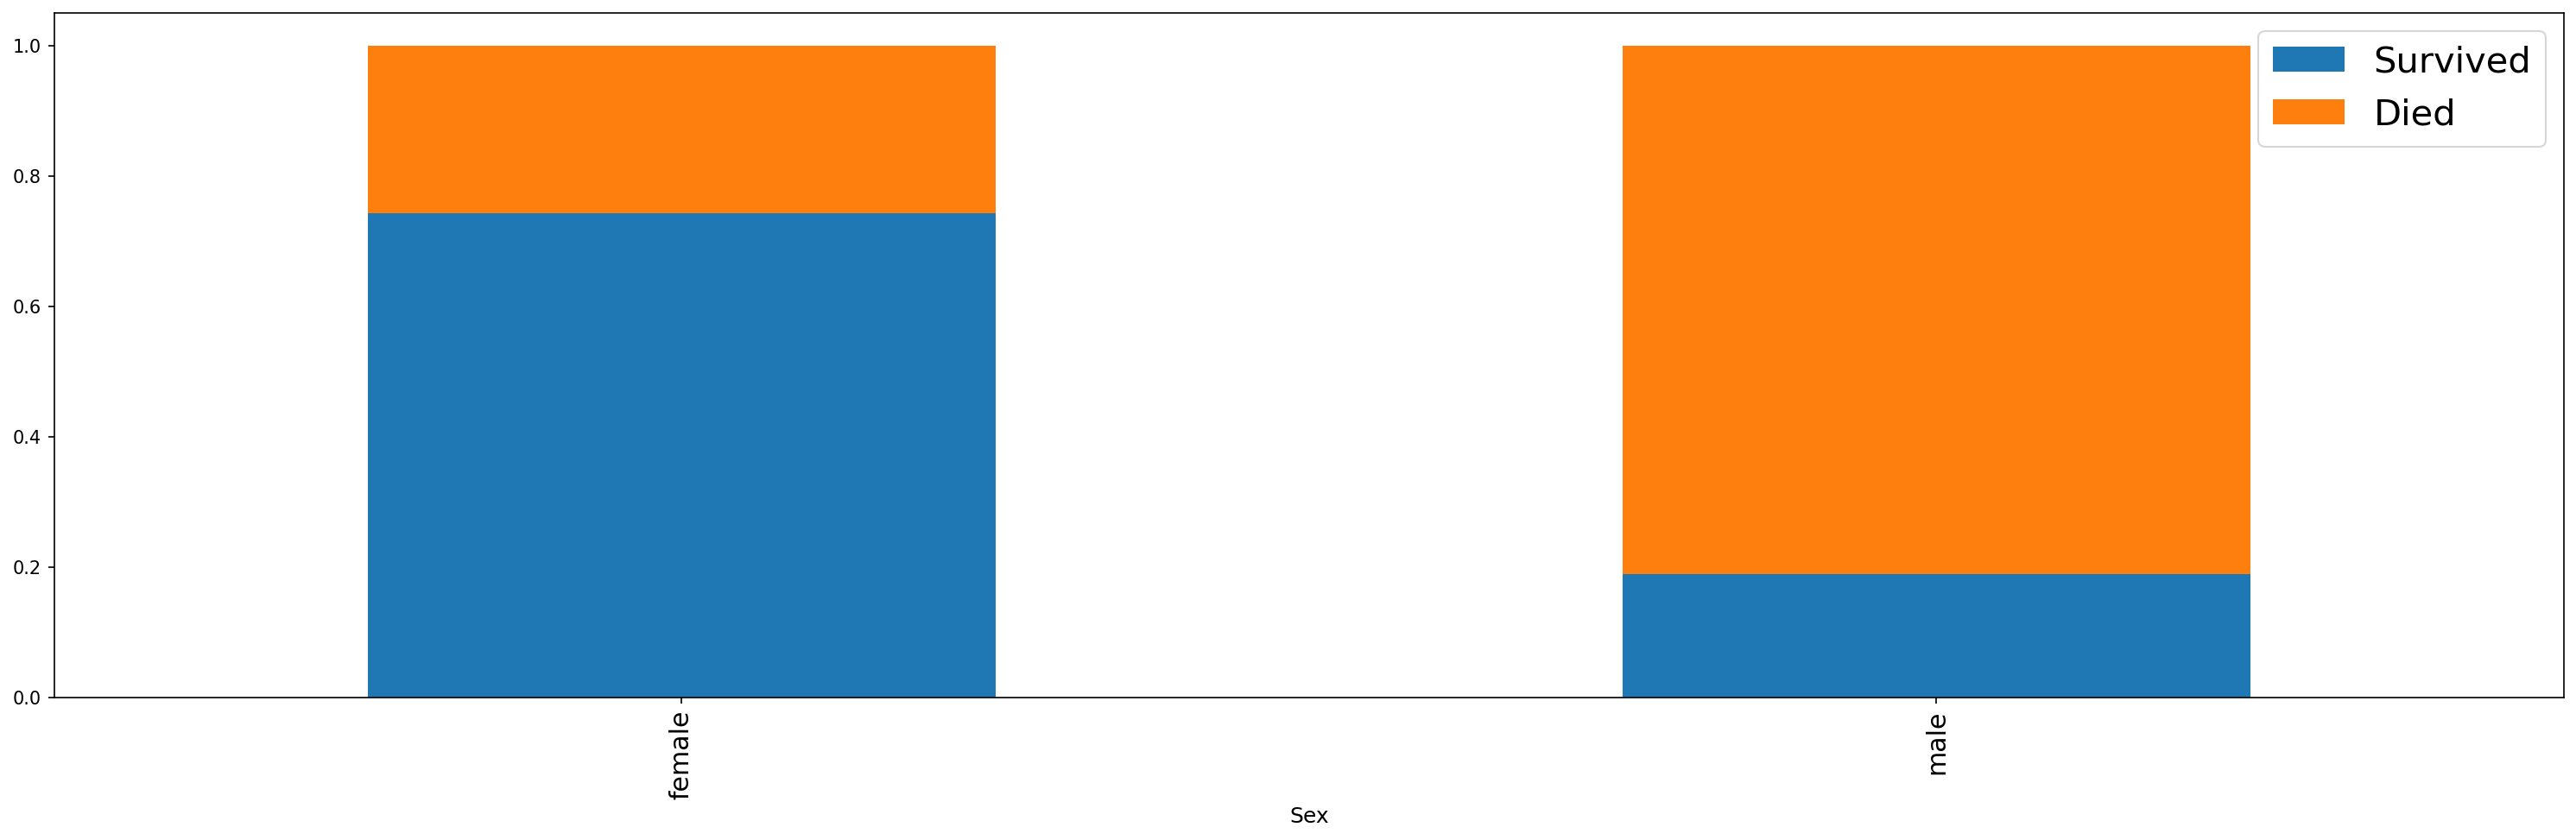

In [10]:
data.groupby('Sex').agg('mean')[['Survived', 'Died']].plot(kind='bar', 
                                                          figsize=(25,7), stacked=True)

The Sex variable seems to be a discriminative feature. Women are more likely to survive.

Let’s now correlate the survival with the age variable.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

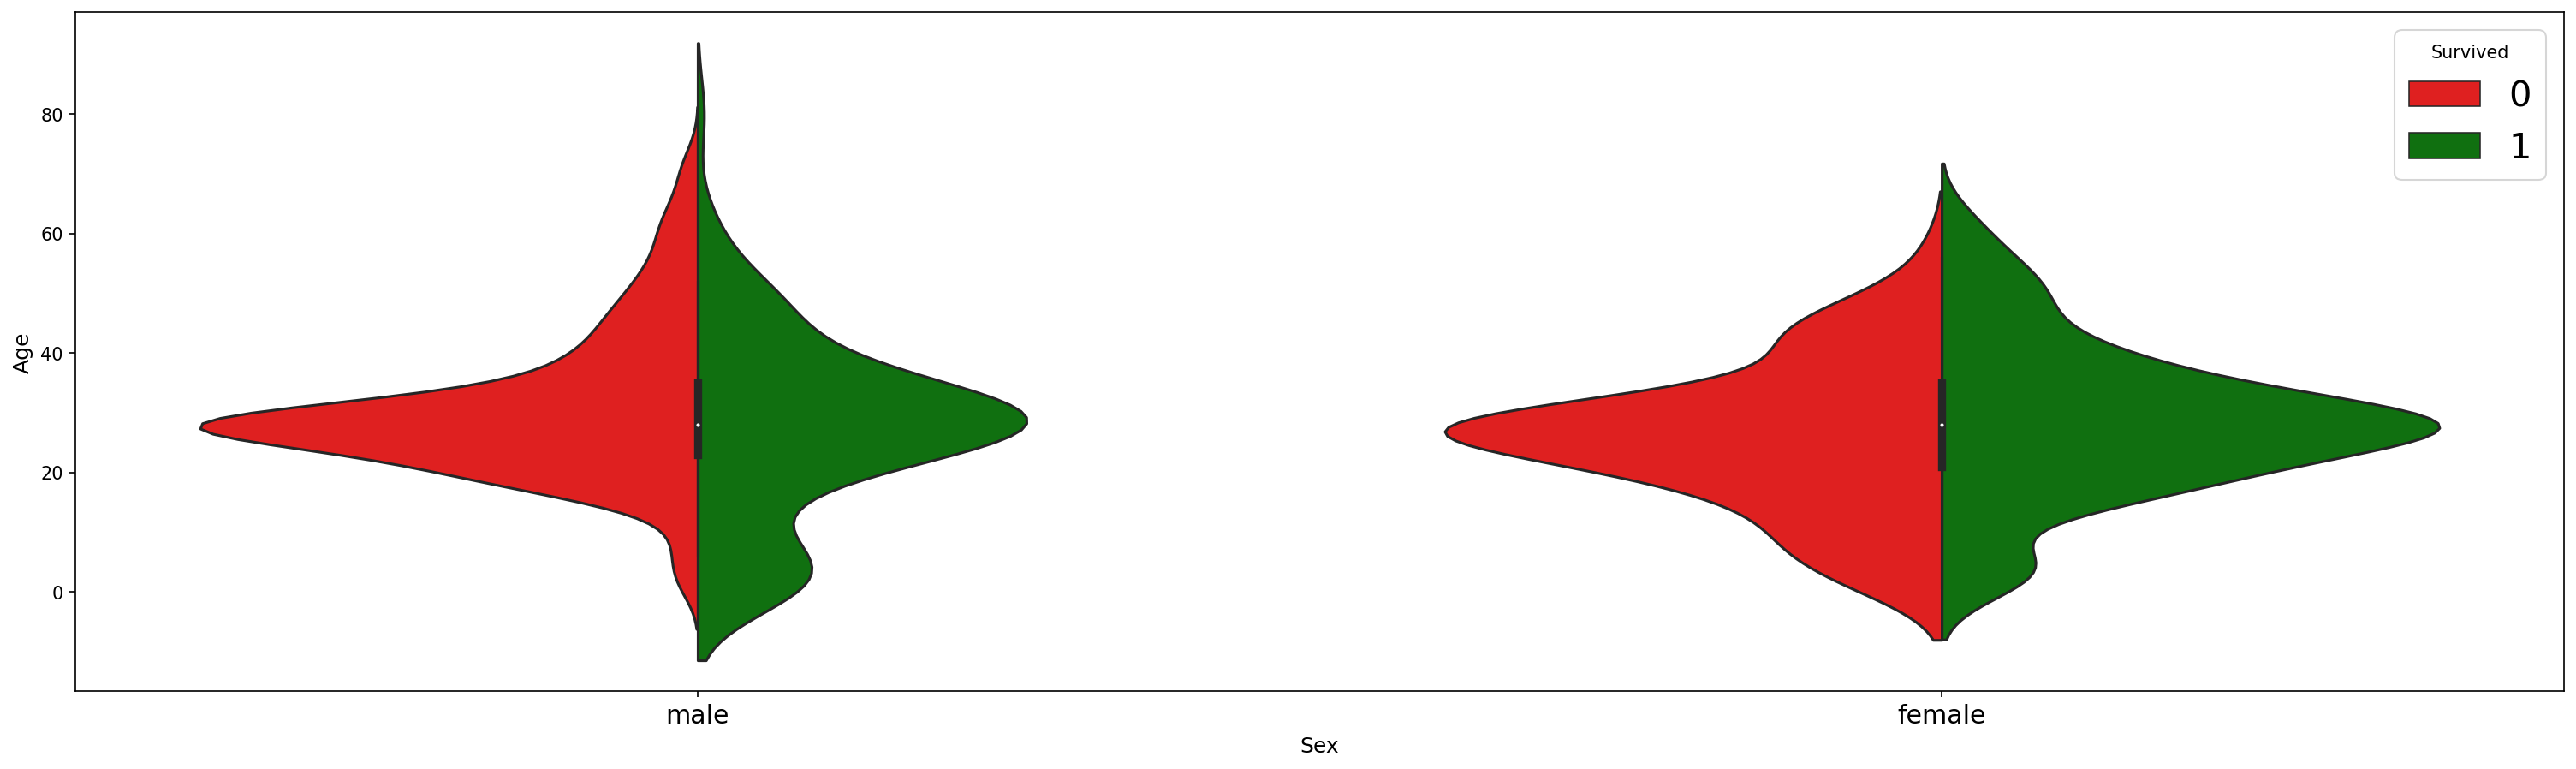

In [11]:
fig = plt.figure(figsize=(25,7))
sns.violinplot(x='Sex', y='Age',
              hue='Survived', data=data,
              split=True,
              palette={0: 'r', 1: 'g'})

As we saw in the chart above and validate by the following:

- Women survive more than men, as depicted by the larger female green histogram

Now, we see that:

The age conditions the survival for male passengers:

- Younger male tend to survive
- A large number of passengers between 20 and 40 succumb

The age doesn’t seem to have a direct impact on the female survival

These violin plots confirm that one old code of conduct that sailors and captains follow in case of threatening situations: “Women and children first !”.

Let’s now focus on the Fare ticket of each passenger and see how it could impact the survival.

In [12]:
data[data['Survived'] == 1]['Fare']

1      71.2833
2       7.9250
3      53.1000
8      11.1333
9      30.0708
        ...   
875     7.2250
879    83.1583
880    26.0000
887    30.0000
889    30.0000
Name: Fare, Length: 342, dtype: float64

In [13]:
data[data['Survived'] == 0]['Fare']

0       7.2500
4       8.0500
5       8.4583
6      51.8625
7      21.0750
        ...   
884     7.0500
885    29.1250
886    13.0000
888    23.4500
890     7.7500
Name: Fare, Length: 549, dtype: float64

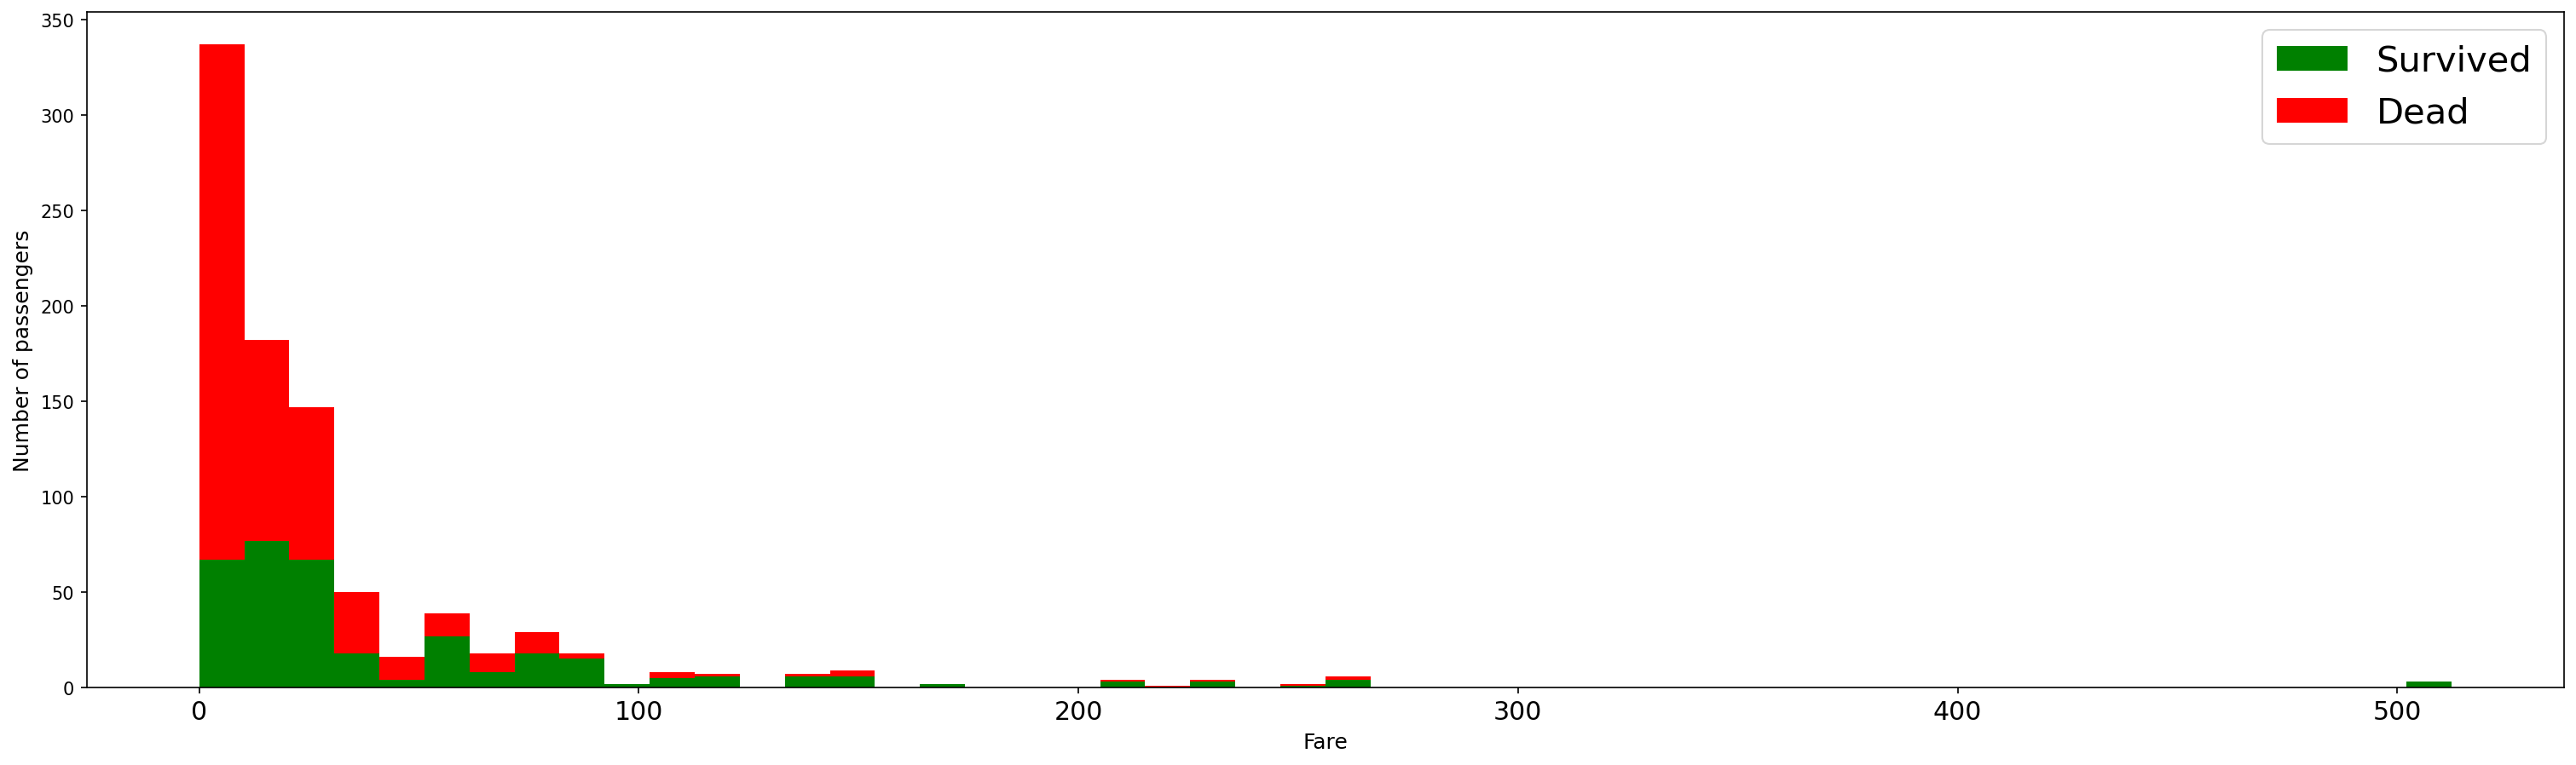

In [14]:
fig = plt.figure(figsize=(25,7))
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']],
        stacked=True, color=['g', 'r'],
        bins = 50, label=['Survived', 'Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

Passengers with cheaper ticket fares are more likely to die. Put differently, passengers with more expensive tickets, and therefore a more important social status, seem to be rescued first.

Ok, this is nice. Let’s now combine the age, the fare and the survival on a single chart.

In [15]:
data[data['Survived'] == 1]['Fare']

1      71.2833
2       7.9250
3      53.1000
8      11.1333
9      30.0708
        ...   
875     7.2250
879    83.1583
880    26.0000
887    30.0000
889    30.0000
Name: Fare, Length: 342, dtype: float64

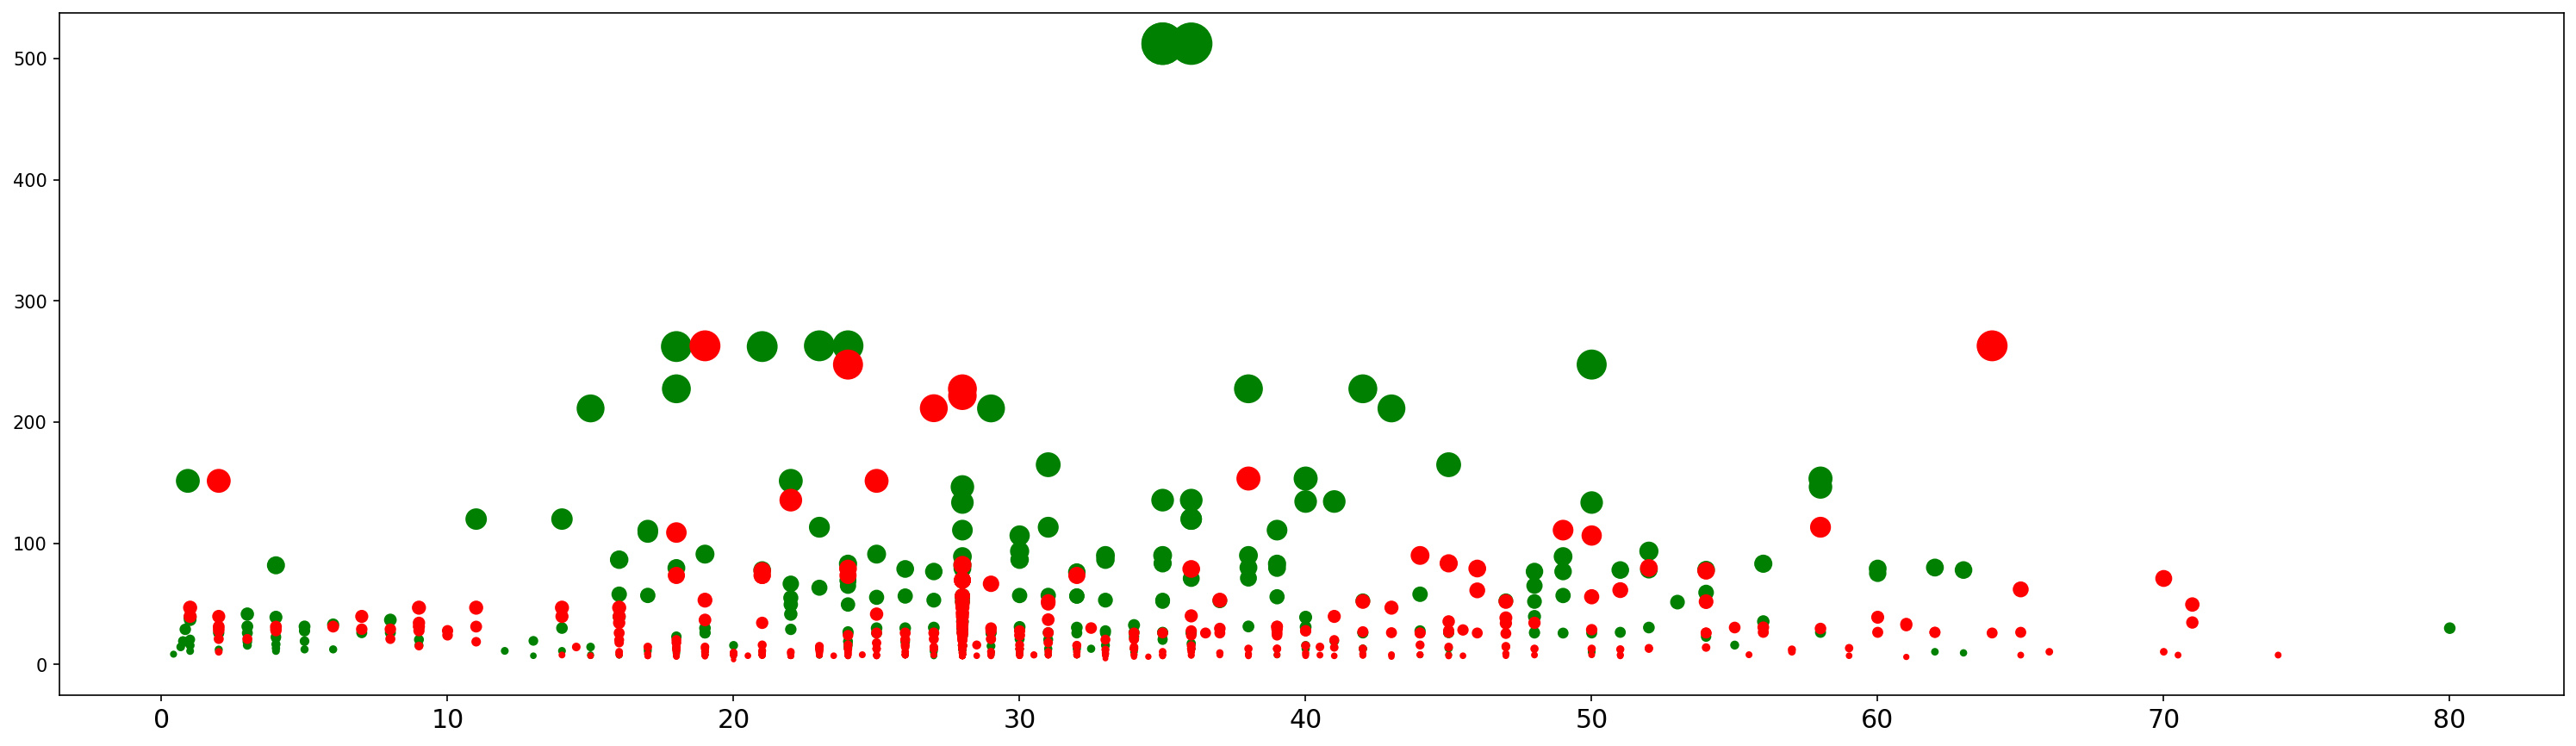

In [16]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()

ax.scatter(x=data[data['Survived'] == 1]['Age'], y=data[data['Survived'] == 1]['Fare'],
          c='green', s = data[data['Survived'] == 1]['Fare'])
ax.scatter(x=data[data['Survived'] == 0]['Age'], y=data[data['Survived'] == 0]['Fare'],
          c='red', s = data[data['Survived'] == 0]['Fare'])

The size of the circles is proportional to the ticket fare.

On the x-axis, we have the ages and the y-axis, we consider the ticket fare.

We can observe different clusters:

1. Large green dots between x=20 and x=45: adults with the largest ticket fares
2. Small red dots between x=10 and x=45, adults from lower classes on the boat
3. Small greed dots between x=0 and x=7: these are the children that were saved

As a matter of fact, the ticket fare correlates with the class as we see it in the chart below.

<AxesSubplot:xlabel='Pclass', ylabel='Average fare'>

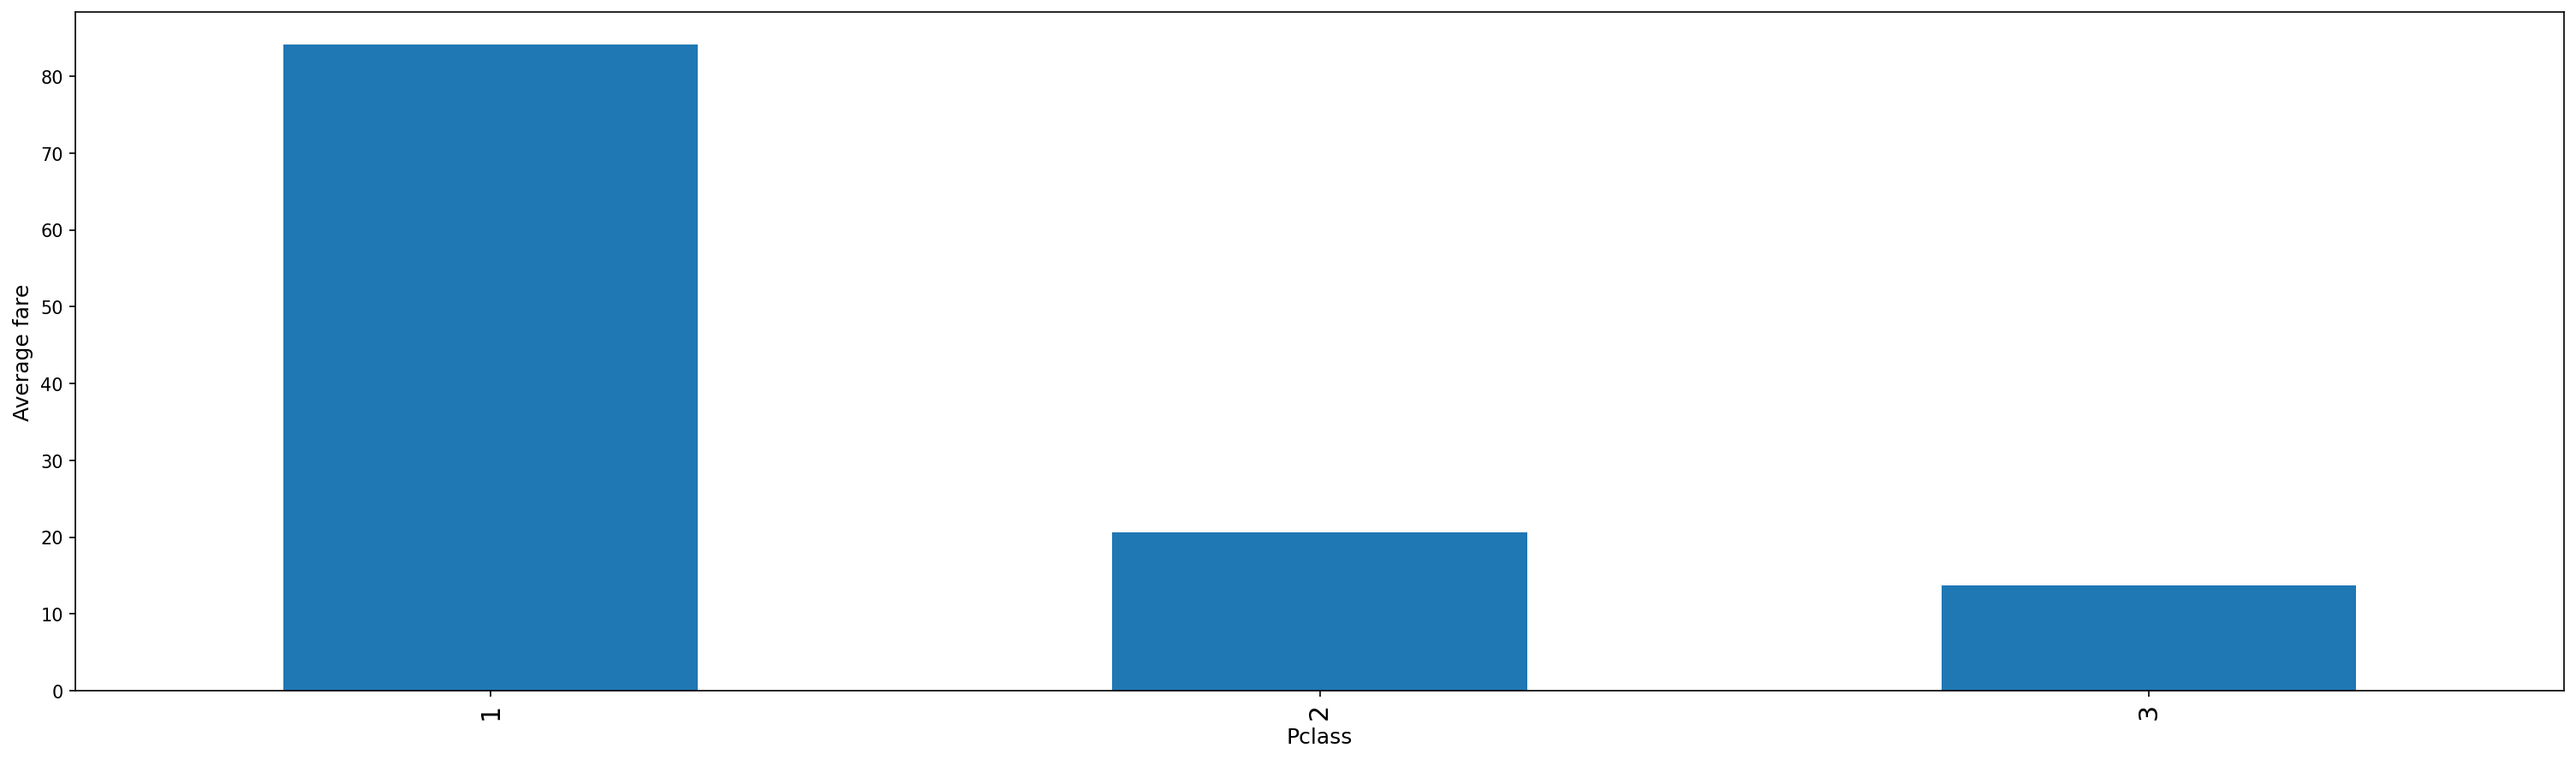

In [17]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(25,7), ax=ax)

Let’s now see how the embarkation site affects survival.

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

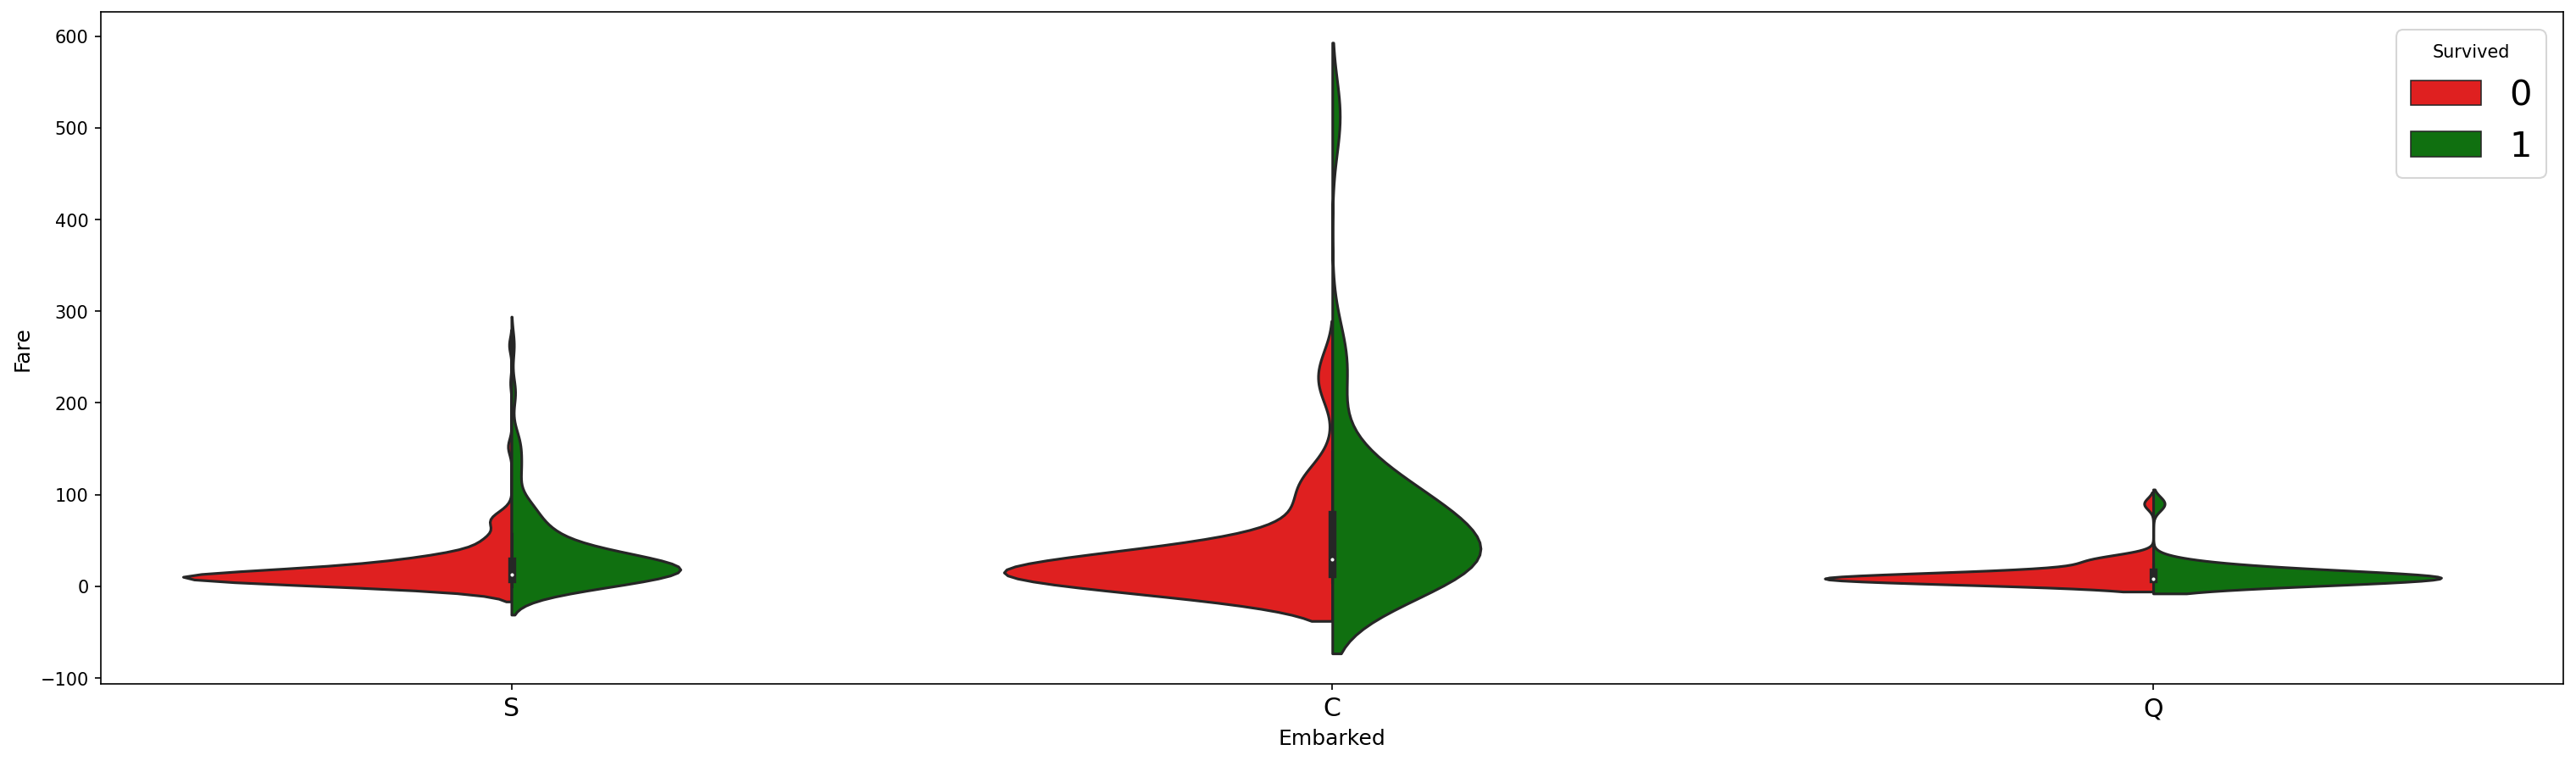

In [18]:
fig = plt.figure(figsize=(25,7))
sns.violinplot(x='Embarked', y='Fare',
              hue='Survived', data=data,
              split=True,
              palette={0: 'r', 1: 'g'})

It seems that embarkation C has a wider range of fare tickets and therefore the passengers who pay the highest prices are those who survive.

We also see this happening in embarkation S and less in embarkation Q.

Let’s now stop with data exploration and switch to the next part.

# 2 - Feature engineering

In the previous part, we flirted out with the data and spotted some interesting correlations.

In this part, we’ll see how to process and transform these variables in such a way the data becomes manageable by a machine learning algorithm.
We’ll also create, or “engineer” additional features that will be useful in building the model.

We’ll see along the way how to process text variables like the passenger names and integrate this information into our model.
We will break our code in separate functions for more clarity.

But first, let’s define a print function that asserts whether or not a feature has been processed.

In [19]:
def status(feature):
    print('Processing', feature, ':ok')

## Loading the data

One trick I find useful when starting a machine learning problem is to append the training set to the test set together.

__We’ll engineer new features using the train set only to prevent information leakage__. The variables we’ll add to the test set will be inferred using the information from the train set.

Let’s load the train and test sets and append them together.

In [20]:
def get_combined_data():
    # reading train data
    train = pd.read_csv('./data/train.csv')
    
    #reading test data
    test = pd.read_csv('./data/test.csv')
    
    # extracting and then removing the targest from the training data
    targets = train.Survived
    train.drop(['Survived'], axis=1, inplace=True)
    
    # merging train data and test data for future feature engineering
    # we'll also remove the PassengerID since this is not an informative feature
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'PassengerId'], inplace = True, axis = 1)
    
    return combined

combined = get_combined_data()

Let’s have a look at the shape :

In [21]:
combined.shape

(1309, 10)

train and test sets are combined.

You may notice that the total number of rows (1309) is the exact summation of the number of rows in the train set and the test set.

In [22]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Extracting the passenger titles

When looking at the passenger names one could wonder how to process them to extract useful information.

If you look closely at these first examples:

- Braund, Mr. Owen Harris
- Heikkinen, Miss. Laina
- Oliva y Ocana, Dona. Fermina
- Peter, Master. Michael J

You will notice that each name has a title in it! This can be a simple Miss. or Mrs. but it can be sometimes something more sophisticated like Master, Sir or Dona. In that case, we might introduce additional information about the social status by simply parsing the name and extracting the title and converting it to a binary variable.

Let’s see how we’ll do that in the function below.

Let’s first see what the different titles are in the train set.

In [23]:
titles = set()

for name in data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
    
titles

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [24]:
Title_Dictionary = {
    'Capt': 'Officer',
     'Col': 'Officer',
     'Don': 'Royalty',
     'Dr': 'Officer',
     'Jonkheer': 'Royalty',
     'Lady': 'Royalty',
     'Major': 'Officer',
     'Master': 'Master',
     'Miss':  'Miss',
     'Mlle': 'Miss',
     'Mme': 'Mrs',
     'Mr':'Mrs',
     'Mrs': 'Mrs',
     'Ms': 'Mrs',
     'Rev': 'Officer',
     'Sir':'Royalty',
     'the Countess':'Royalty'
    
}

def get_titles():
    # We extrat the title from each name
    combined['Title'] = combined['Name'].map(
        lambda name: name.split(',')[1].split('.')[0].strip()) 
    
    # a map of a more aggregated title
    # we map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)
    status('Title')
    return combined

This function parses the names and extracts the titles. Then, it maps the titles to categories of titles. We selected :

- Officer
- Royalty
- Mr
- Mrs
- Miss
- Master

Let’s run it!

In [25]:
combined = get_titles()
combined.head()

Processing Title :ok


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mrs
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mrs


Let’s check if the titles have been filled correctly.

In [26]:
combined[combined.Title.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,NaN


There is indeed a NaN value in the line number 1305. In fact, the corresponding name is Oliva y Ocana, __Dona__. Fermina.

This title was not encountered in the training dataset.

Perfect. Now we have an additional column called Title that contains the information.

## Processing Ages

We have seen in the first part that the Age variable was missing 177 values. This is a large number ( ~ 13% of the dataset). Simply replacing them with the mean or the median age might not be the best solution since the age may differ by groups and categories of passengers.

To understand why, let’s group our dataset by sex, Title and passenger class and for each subset compute the median age.

To avoid data leakage from the test set, we fill in missing ages in the train using the train set and we fill in ages in the test set using values calculated from the train set as well.

Number of missing ages in train set

In [27]:
combined.Age[:len(data)].isnull().sum()

177

Number of missing ages in the test set

In [28]:
combined.Age[len(data):].isnull().sum()

86

In [29]:
grouped_train = combined.iloc[:len(data)].groupby(['Sex', 'Pclass', 'Title'])
grouped_median_train = grouped_train.median()

grouped_median_train.head(50)

Age  SibSp  Parch       Fare
Sex    Pclass Title                                 
female 1      Miss     30.0    0.0    0.0   88.25000
              Mrs      40.0    1.0    0.0   79.20000
              Officer  49.0    0.0    0.0   25.92920
              Royalty  40.5    0.5    0.0   63.05000
       2      Miss     24.0    0.0    0.0   13.00000
              Mrs      31.5    1.0    0.0   26.00000
       3      Miss     18.0    0.0    0.0    8.75625
              Mrs      31.0    1.0    1.0   15.97500
male   1      Master    4.0    1.0    2.0  120.00000
              Mrs      40.0    0.0    0.0   42.40000
              Officer  51.0    0.0    0.0   35.50000
              Royalty  40.0    0.0    0.0   27.72080
       2      Master    1.0    1.0    1.0   26.00000
              Mrs      31.0    0.0    0.0   13.00000
              Officer  46.5    0.0    0.0   13.00000
       3      Master    4.0    3.5    1.0   28.51250
              Mrs      26.0    0.0    0.0    7.89580

In [30]:
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

grouped_median_train.head(50)

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0
5,female,2,Mrs,31.5
6,female,3,Miss,18.0
7,female,3,Mrs,31.0
8,male,1,Master,4.0
9,male,1,Mrs,40.0


This dataframe will help us impute missing age values based on different criteria.

Look at the median age column and see how this value can be different based on the Sex, Pclass and Title put together.

For example:
- If the passenger is female, from Pclass 1, and from royalty the median age is 40.5.
- If the passenger is male, from Pclass 3, with a Mr title, the median age is 26.

Let’s create a function that fills in the missing age in combined based on these different attributes.

In [31]:
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) &
        (grouped_median_train['Title'] == row['Title']) &
        (grouped_median_train['Pclass'] == row['Pclass'])
    )
    
    return grouped_median_train[condition]['Age'].values[0]

def process_age():
    global combined
    # a function that fills the missing values of the Age variable
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], 
                                    axis = 1)
    status('age')
    return combined

combined = process_age()
    
    

Processing age :ok


In [32]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
 10  Title     1308 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 112.6+ KB


Perfect. The missing ages have been replaced.

However, we notice a missing value in Fare, two missing values in Embarked and a lot of missing values in Cabin. We’ll come back to these variables later.

Let’s now process the names.

In [33]:
def process_names():
    global combined
    # We clean the name variable
    combined.drop('Name', axis=1, inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(combined['Title'], prefix='Title')
    combined = pd.concat([combined, titles_dummies], axis=1)
    
    # removing the title variable
    combined.drop('Title', axis=1, inplace=True)
    
    status('names')
    
    return combined

This function drops the Name column since we won’t be using it anymore because we created a Title column.
Then we encode the title values using a dummy encoding.

You can learn about dummy coding and how to easily do it in Pandas here.

In [34]:
combined = process_names()
combined.head()

Processing names :ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0


As you can see :

- there is no longer a name feature.
- new variables (Title_X) appeared. These features are binary.

For example, If Title_Mr = 1, the corresponding Title is Mr.

## Processing Fare

Let’s impute the missing fare value by the average fare computed on the train set

In [35]:
def process_fares():
    global combined
    # there's one missing fare value - replace it with the mean.
    combined.Fare.fillna(combined.iloc[:len(data)].Fare.mean(), inplace = True)
    
    status('fare')
    return combined

This function simply replaces one missing Fare value by the mean.

In [36]:
combined = process_fares()

Processing fare :ok


## Processing Embarked

In [37]:
def process_Embarked():
    global combined
    # two missing embarked values - filling them with the most frequent one in the train set(S)
    combined.Embarked.fillna('S', inplace = True)
    # dummy enconding
    embarked_dummies = pd.get_dummies(combined['Embarked'], prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies], axis=1)
    combined.drop('Embarked', axis=1, inplace=True)
    status('embarked')
    return combined

This function replaces the two missing values of Embarked with the most frequent Embarked value.

In [38]:
combined = process_Embarked()
combined.head()

Processing embarked :ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,1


## Processing Cabin

In [39]:
train_cabin, test_cabin = set(), set()

for c in combined.iloc[:len(data)]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')
        
for c in combined.iloc[len(data):]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')
            
print(train_cabin)
print(test_cabin)

{'G', 'E', 'F', 'B', 'D', 'T', 'U', 'A', 'C'}
{'G', 'E', 'F', 'B', 'D', 'U', 'A', 'C'}


We don’t have any cabin letter in the test set that is not present in the train set.

In [40]:
def process_cabin():
    global combined
    # replacing missing cabins with U (for Unknow)
    combined.Cabin.fillna('U', inplace=True)
    
    # mapping each Cabin value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])
    
    # dummy encoding...
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')
    combined = pd.concat([combined, cabin_dummies], axis=1)
    
    combined.drop('Cabin', axis=1, inplace=True)
    status('cabin')
    return combined

This function replaces NaN values with U (for Unknow). It then maps each Cabin value to the first letter. Then it encodes the cabin values using dummy encoding again.

In [41]:
combined = process_cabin()

Processing cabin :ok


Ok, no missing values now.

In [42]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,3,male,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1


## Processing Sex

In [43]:
def process_sex():
    global combined
    # mapping string values to numerical one
    combined['Sex'] = combined['Sex'].map({'male': 1, 'female':0})
    status('Sex')
    return combined

This function maps the string values male and female to 1 and 0 respectively.

In [44]:
combined = process_sex()

Processing Sex :ok


## Processing Pclass

In [45]:
def process_pclass():
    global combined
    
    # encoding into 3 categories
    pclass_dummies = pd.get_dummies(combined['Pclass'], prefix='Pclass')
    
    # adding dummy variable
    combined = pd.concat([combined, pclass_dummies], axis=1)
    
    # removing "Pclass"
    combined.drop('Pclass', axis=1, inplace=True)
    
    status('pclass')
    return combined

This function encodes the values of Pclass (1,2,3) using a dummy encoding

In [46]:
combined = process_pclass()

Processing pclass :ok


## Processing Ticket

Let’s first see how the different ticket prefixes we have in our dataset

In [47]:
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t: not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else:
        return 'XXX'

tickets = set()
for t in combined['Ticket']:
    tickets.add(cleanTicket(t))
    
print(len(tickets))

def process_ticket():
    global combined
    
    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix
    # (i.e. the ticket is a digit)
    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    ticket_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
    combined = pd.concat([combined, ticket_dummies], axis=1)
    combined.drop('Ticket', inplace=True, axis=1)
    
    status('Ticket')
    return combined

37


In [48]:
combined = process_ticket()

Processing Ticket :ok


## Procesing Family

This part includes creating new variables based on the size of the family (the size is, by the way, another variable we create).

This creation of new variables is done under a realistic assumption: Large families are grouped together, hence they are more likely to get rescued than people traveling alone.

In [49]:
def process_family():
    global combined
    
    # introduction a new feature: the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other feature based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    status('family')
    return combined    

This function introduces 4 new features:
- FamilySize : the total number of relatives including the passenger (him/her)self.
- Sigleton : a boolean variable that describes families of size = 1
- SmallFamily : a boolean variable that describes families of 2 <= size <= 4
- LargeFamily : a boolean variable that describes families of 5 < size

We end up with a total of 67 features.

In [50]:
combined = process_family()

Processing family :ok


In [51]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


# 3 - Modeling 

In this part, we use our knowledge of the passengers based on the features we created and then build a statistical model. You can think of this model as a box that crunches the information of any new passenger and decides whether or not he survives.

There is a wide variety of models to use, from logistic regression to decision trees and more sophisticated ones such as random forests and gradient boosted trees.

We’ll be using Random Forests. Random Forests has proven a great efficiency in Kaggle competitions.

For more details about why ensemble methods perform well, you can refer to these posts:
- http://mlwave.com/kaggle-ensembling-guide/
- http://www.overkillanalytics.net/more-is-always-better-the-power-of-simple-ensembles/

Back to our problem, we now have to:
1. Break the combined dataset in the train set and test set.
2. Use the train set to build a predictive model.
3. Evaluate the model using the train set.
4. Test the model using the test set and generate an output file for the submission.

Keep in mind that we’ll have to reiterate on 2. and 3. until an acceptable evaluation score is achieved.

Let’s start by importing useful libraries.

In [52]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

To evaluate our model we’ll be using a 5-fold cross-validation with the accuracy since it’s the metric that the competition uses in the leaderboard.

To do that, we’ll define a small scoring function.

In [53]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv=5, scoring=scoring)
    
    return np.mean(xval)

Recovering the train set and the test set from the combined dataset is an easy task.

In [54]:
def recover_train_test_target():
    global combined
    
    targets = pd.read_csv('./data/train.csv', usecols=['Survived'])['Survived'].values
    train = combined.iloc[:len(data)]
    test = combined.iloc[len(data):]
    
    return train, test, targets

In [55]:
train, test, targets = recover_train_test_target()

In [56]:
test.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
891,1,34.5,0,0,7.8292,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
892,0,47.0,1,0,7.0000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0
893,1,62.0,0,0,9.6875,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
894,1,27.0,0,0,8.6625,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
895,0,22.0,1,1,12.2875,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,1,0


In [57]:
targets

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

## Feature selection

We’ve come up to more than 30 features so far. This number is quite large.

When feature engineering is done, we usually tend to decrease the dimensionality by selecting the “right” number of features that capture the essential.

In fact, feature selection comes with many benefits:

- It decreases redundancy among the data
- It speeds up the training process
- It reduces overfitting

Tree-based estimators can be used to compute feature importance, which in turn can be used to discard irrelevant features.

In [58]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

Let’s have a look at the importance of each feature.

<AxesSubplot:ylabel='feature'>

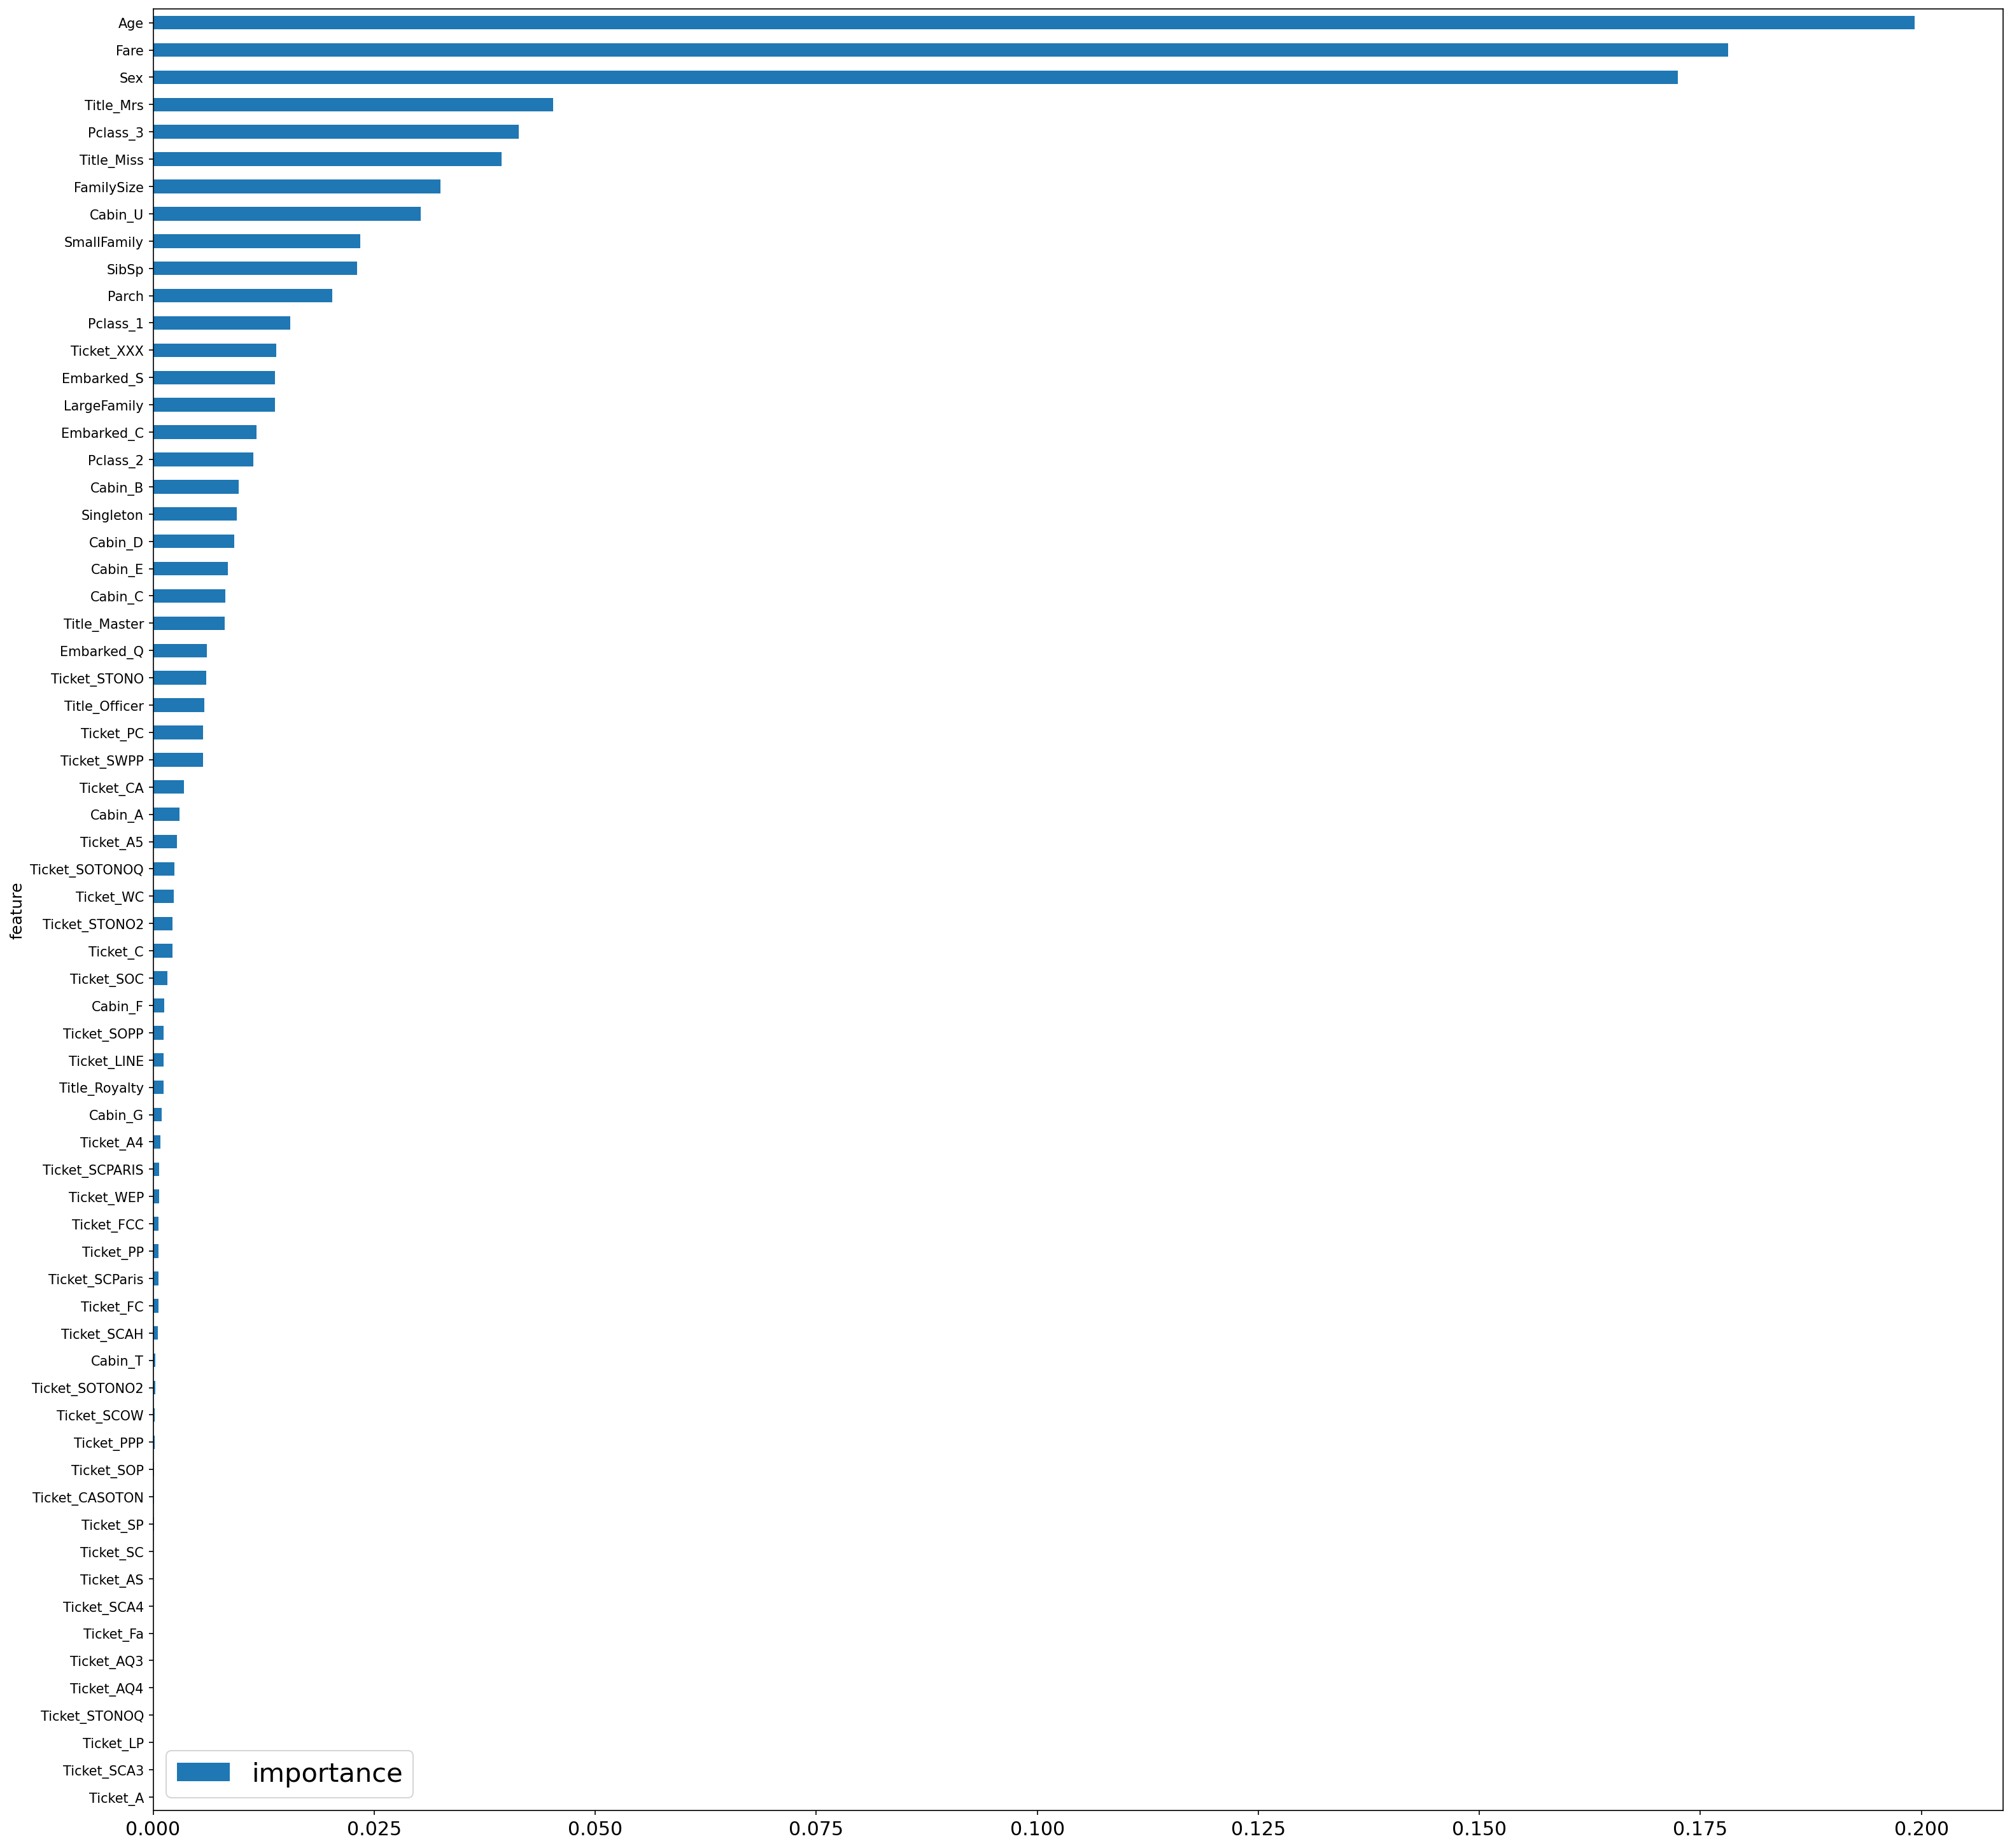

In [59]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 25))

As you may notice, there is great importance linked to Title_Mr, Age, Fare, and Sex.

There is also an important correlation with the Passenger_Id.
Let’s now transform our train set and test set in more compact datasets.

In [60]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
train_reduced.shape

(891, 12)

In [61]:
combined.shape

(1309, 66)

In [62]:
test_reduced = model.transform(test)
test_reduced.shape

(418, 12)

Yay! Now we’re down to a lot fewer features.

We’ll see if we’ll use the reduced or the full version of the train set.

## Let's try different base models

In [63]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

In [64]:
models = [logreg, logreg_cv, rf, gboost]

In [65]:
for model in models:
    print("Cross-validation of: {0}".format(model.__class__))
    score = compute_score(clf=model, X=train_reduced, y=targets, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of: <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.8114556525014123
****
Cross-validation of: <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.819295712761283
****
Cross-validation of: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.8215617349821104
****
Cross-validation of: <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.824913690289373
****


## Hyperparameters tuning

As mentioned at the beginning of the Modeling part, we will be using a Random Forest model. It may not be the best model for this task but we’ll show how to tune. This work can be applied to different models.

Random Forest is quite handy. They do however come with some parameters to tweak in order to get an optimal model for the prediction task.

To learn more about Random Forests, you can refer to this link :

Additionally, we’ll use the full train set.

In [66]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

Now that the model is built by scanning several combinations of the hyperparameters, we can generate an output file to submit on Kaggle.

In [67]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('./data/test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId', 'Survived']].to_csv('./grindersearch_rf.csv', index=False)

## BONUS: Blending different models

I haven’t personally uploaded a submission based on model blending but here’s how you could do it

In [68]:
trained_models = []
for model in models:
    model.fit(train, targets)
    trained_models.append(model)

predictions = []
for model in trained_models:
    predictions.append(model.predict_proba(test)[:, 1])

predictions_df = pd.DataFrame(predictions).T
predictions_df['out'] = predictions_df.mean(axis=1)
predictions_df['PassengerId'] = aux['PassengerId']
predictions_df['out'] = predictions_df['out'].map(lambda s: 1 if s >= 0.5 else 0)

predictions_df = predictions_df[['PassengerId', 'out']]
predictions_df.columns = ['PassengerId', 'Survived']

predictions_df.to_csv('./blending_base_models.csv', index=False)

To have a good blending submission, the base models should be different and their correlations uncorrelated.

# 4 - Conclusion

In this article, we explored an interesting dataset brought to us by Kaggle.

We went through the basic bricks of a data science pipeline:

- Data exploration and visualization: an initial step to formulating hypotheses
- Data cleaning
- Feature engineering
- Feature selection
- Hyperparameters tuning
- Submission
- Blending

This post can be downloaded as a notebook if you ever want to test and play with it: my Github repo

Lots of articles have been written about this challenge, so obviously there is room for improvement.

Here is what I suggest for the next steps:

- Dig more in the data and eventually build new features.
- Try different models: logistic regressions, Gradient Boosted trees, XGboost, …
- Try ensemble learning techniques (stacking)
- Run auto-ML frameworks

I would be more than happy if you could find out a way to improve my solution. This could make me update the article and definitely give you credit for that. So feel free to post a comment.

# 5 - Apendix

Apply PCA to the new data

In [69]:
from sklearn.decomposition import PCA

In [70]:
pca = PCA(n_components=0.99) # 0.95 means variance between 95-99%
pca.fit(train)
train_red = pca.transform(train)
test_red = pca.transform(test)

Here I'm going to use all the models we attempt in previous trials.

In [71]:
# import models we want to use
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
rf_clf = RandomForestClassifier()
ab_clf = AdaBoostClassifier()
gb_clf = GradientBoostingClassifier()
lr_clf = LogisticRegression()
sgd_clf = SGDClassifier()
svm_clf = SVC()
sgd_clf = SGDClassifier()
dt_clf = DecisionTreeClassifier()
kn_clf = KNeighborsClassifier()
gnb_clf = GaussianNB()
lda_clf = LinearDiscriminantAnalysis()
qda_clf = QuadraticDiscriminantAnalysis()

classifiers = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(n_jobs=10),
    SGDClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

In [73]:
X_train = pd.DataFrame(train_red)
y_train = pd.DataFrame(targets)
X_test = pd.DataFrame(test_red)

In [74]:
splits = 50
sss = StratifiedShuffleSplit(n_splits=splits, test_size=0.1, random_state=0)

X = X_train
y = y_train

acc_dict = {}

for train_index, test_index in sss.split(X,y):
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_tr, y_tr)
        train_predictions = clf.predict(X_ts)
        acc = accuracy_score(y_ts, train_predictions)        
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc
            
log = log.drop(log.index, axis=0)
    
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / splits
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

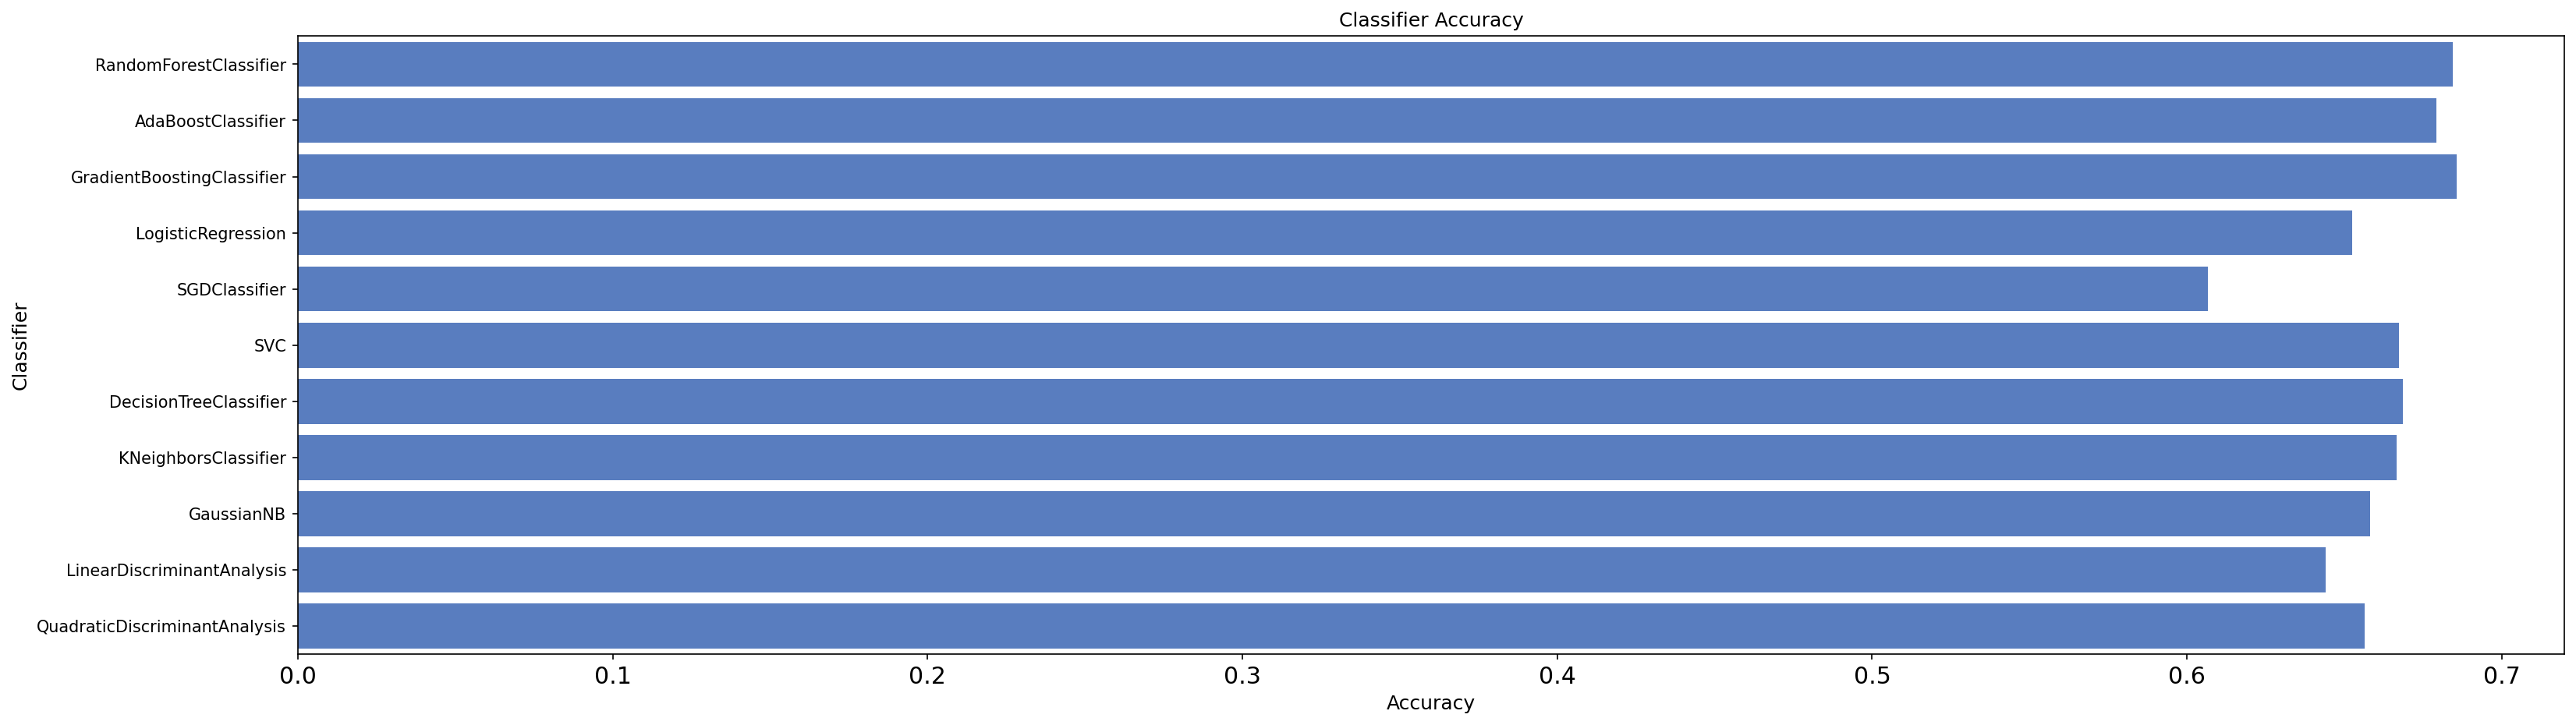

In [75]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color='b')

In [76]:
log

,Classifier,Accuracy
0,RandomForestClassifier,0.684444
0,AdaBoostClassifier,0.679111
0,GradientBoostingClassifier,0.685556
0,LogisticRegression,0.652444
0,SGDClassifier,0.606667
0,SVC,0.667333
0,DecisionTreeClassifier,0.668667
0,KNeighborsClassifier,0.666667
0,GaussianNB,0.658222
0,LinearDiscriminantAnalysis,0.644000


### Apply RandomForest to obtain the predictions to be submmited

In [77]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

In [78]:
y_pred = pd.DataFrame(data={'PassengerId' : X_test.index + len(data) + 1, 'Survived' : y_pred})
y_pred = y_pred.set_index('PassengerId')
y_pred.head()

,Survived
PassengerId,
892,0
893,0
894,1
895,1
896,0


In [79]:
y_pred.tail()

,Survived
PassengerId,
1305,0
1306,1
1307,0
1308,0
1309,1


In [80]:
# Prepare submission file
output = pd.DataFrame(y_pred)
output.to_csv('submission.csv', index=True)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [81]:
train.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


In [82]:
test.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
891,1,34.5,0,0,7.8292,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
892,0,47.0,1,0,7.0000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0
893,1,62.0,0,0,9.6875,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
894,1,27.0,0,0,8.6625,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
895,0,22.0,1,1,12.2875,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,1,0


In [84]:
train_lite = pd.DataFrame(train[['Age', 'Sex', 'Fare']])
test_lite = pd.DataFrame(test[['Age', 'Sex', 'Fare']])
train_lite.shape

(891, 3)

In [85]:
train_lite.head()

,Age,Sex,Fare
0,22.0,1,7.2500
1,38.0,0,71.2833
2,26.0,0,7.9250
3,35.0,0,53.1000
4,35.0,1,8.0500


In [86]:
test_lite.head()

,Age,Sex,Fare
891,34.5,1,7.8292
892,47.0,0,7.0000
893,62.0,1,9.6875
894,27.0,1,8.6625
895,22.0,0,12.2875


In [87]:
splits = 50
sss = StratifiedShuffleSplit(n_splits=splits, test_size=0.1, random_state=0)

X = train_lite
y = y_train

acc_dict = {}

for train_index, test_index in sss.split(X,y):
    X_tr, X_ts = X.iloc[train_index], X.iloc[test_index]
    y_tr, y_ts = y.iloc[train_index], y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
        clf.fit(X_tr, y_tr)
        train_predictions = clf.predict(X_ts)
        acc = accuracy_score(y_ts, train_predictions)        
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc
            
log = log.drop(log.index, axis=0)
    
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / splits
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

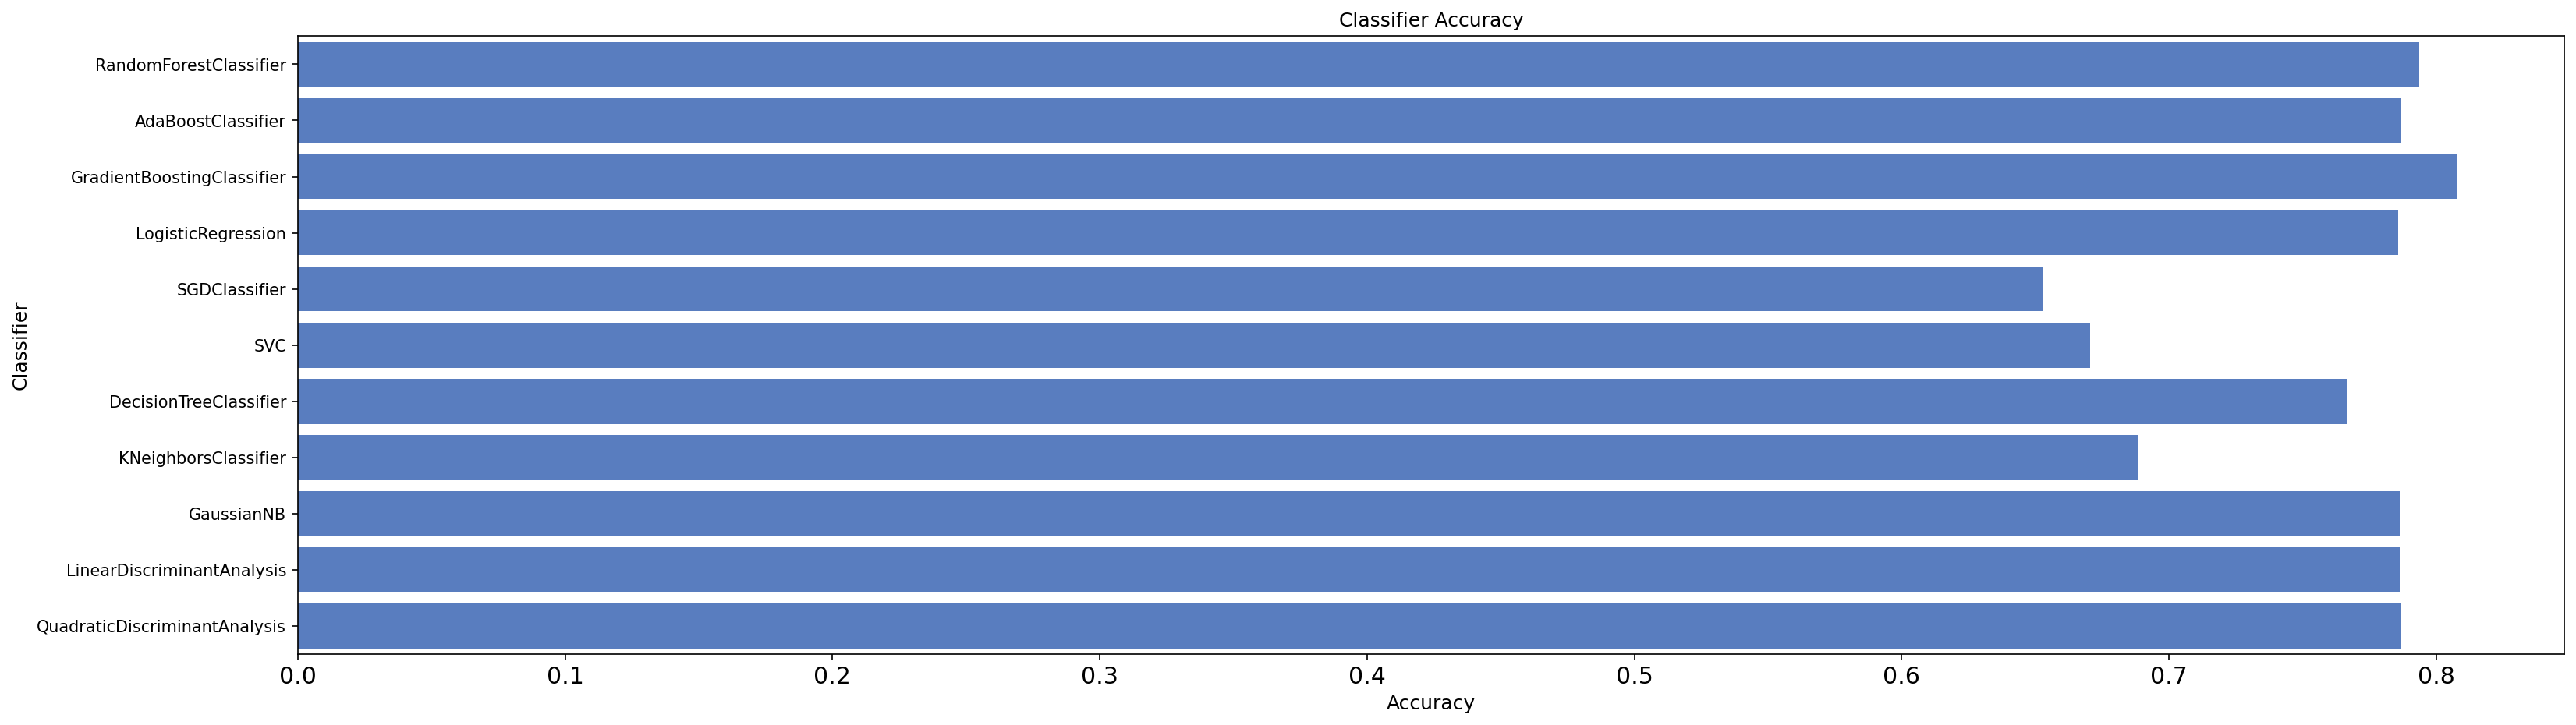

In [88]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color='b')

In [89]:
log

,Classifier,Accuracy
0,RandomForestClassifier,0.793778
0,AdaBoostClassifier,0.786889
0,GradientBoostingClassifier,0.807556
0,LogisticRegression,0.785778
0,SGDClassifier,0.653111
0,SVC,0.670444
0,DecisionTreeClassifier,0.766667
0,KNeighborsClassifier,0.688667
0,GaussianNB,0.786222
0,LinearDiscriminantAnalysis,0.786444


### Apply RandomForest to obtain the predictions to be submmited

In [90]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)

In [91]:
y_pred = pd.DataFrame(data={'PassengerId' : X_test.index + len(data) + 1, 'Survived' : y_pred})
y_pred = y_pred.set_index('PassengerId')
y_pred.head()

,Survived
PassengerId,
892,0
893,0
894,1
895,0
896,0


In [92]:
y_pred.tail()

,Survived
PassengerId,
1305,0
1306,1
1307,0
1308,0
1309,1


In [93]:
# Prepare submission file
output = pd.DataFrame(y_pred)
output.to_csv('submission.csv', index=True)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [94]:
combined.describe()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.644003,29.213270,0.498854,0.385027,33.294646,0.046600,0.200153,0.731092,0.017571,0.003820,0.206264,0.093965,0.699771,0.016807,0.049656,0.071811,0.035141,0.031322,0.016043,0.003820,0.000764,0.774637,0.246753,0.211612,0.541635,0.000764,0.007639,0.021390,0.000764,0.000764,0.000764,0.006112,0.051948,0.000764,0.002292,0.006875,0.000764,0.003056,0.000764,0.070283,0.003056,0.001528,0.001528,0.000764,0.001528,0.003820,0.000764,0.010695,0.003820,0.006112,0.000764,0.005348,0.002292,0.018335,0.000764,0.010695,0.005348,0.000764,0.001528,0.011459,0.003056,0.731092,1.883881,0.603514,0.333843,0.062643
std,0.478997,13.400994,1.041658,0.865560,51.738888,0.210862,0.400267,0.443561,0.131435,0.061709,0.404777,0.291891,0.458533,0.128596,0.217317,0.258273,0.184207,0.174252,0.125688,0.061709,0.027639,0.417981,0.431287,0.408607,0.498454,0.027639,0.087103,0.144737,0.027639,0.027639,0.027639,0.077967,0.222007,0.027639,0.047836,0.082665,0.027639,0.055216,0.027639,0.255720,0.055216,0.039073,0.039073,0.027639,0.039073,0.061709,0.027639,0.102902,0.061709,0.077967,0.027639,0.072959,0.047836,0.134210,0.027639,0.102902,0.072959,0.027639,0.039073,0.106473,0.055216,0.443561,1.583639,0.489354,0.471765,0.242413
min,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,26.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000

In [95]:
combined[combined['Fare'] == 0].head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
179,1,36.0,0,0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
263,1,40.0,0,0,0.0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
271,1,25.0,0,0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
277,1,31.0,0,0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
302,1,19.0,0,0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [96]:
data[data['Fare'] == 0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Died
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,1
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,1
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,28.0,0,0,239853,0.0,NaN,S,1
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,1


In [97]:
test[test['Fare'] == 0].head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
1157,1,40.0,0,0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
1263,1,49.0,0,0,0.0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
